# 🚴‍♂️ Análisis Predictivo de Clientes - *Clasificación BikeBuyer*

## Objetivo:

Clasificar a los clientes que comprarán una bicicleta (`BikeBuyer`) utilizando distintos modelos de clasificación. El proyecto sigue la metodología SEMMA (Sample, Explore, Modify, Model, Assess). Se aplican buenas prácticas de análisis de datos como:

- Normalización de variables para modelos sensibles a escalas.
- Comparación de múltiples modelos de clasificación.
- Evaluación con métricas como **accuracy**, **AUC**, **F1-score**, y más.
- Selección del mejor modelo según estas métricas evaluadas.

## Paso 1: Muestrear
Importamos librerías y cargamos el conjunto de datos. A continuación, se realiza un vistazo preliminar a los datos para entender su estructura y contenido.

### 1.1 Importar librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

### 1.2 Cargar el conjunto de datos

In [2]:
# Cargar el conjunto de datos
pd.options.display.max_columns = None
df = pd.read_excel("data-bikebuyer.xlsx")

# Ver las primeras filas del conjunto de datos
df.head(5)

,CustomerKey,GeographyKey,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,MaritalStatus,Suffix,Gender,EmailAddress,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,SpanishEducation,FrenchEducation,EnglishOccupation,SpanishOccupation,FrenchOccupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,AddressLine2,Phone,DateFirstPurchase,CommuteDistance,Region,BikeBuyer
0,11000,26,AW00011000,NaN,Jon,V,Yang,0,1986-10-06,M,NaN,M,jon24@adventure-works.com,90000,2,0,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,1,0,3761 N. 14th St,NaN,1 (11) 500 555-0162,2011-01-19,1-2 Miles,Pacific,1
1,11001,37,AW00011001,NaN,Eugene,L,Huang,0,1991-05-10,S,NaN,M,eugene10@adventure-works.com,60000,3,3,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,0,1,2243 W St.,NaN,1 (11) 500 555-0110,2011-01-15,0-1 Miles,Pacific,1
2,11002,31,AW00011002,NaN,Ruben,NaN,Torres,0,1986-02-09,M,NaN,M,ruben35@adventure-works.com,60000,3,3,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,1,1,5844 Linden Land,NaN,1 (11) 500 555-0184,2011-01-07,2-5 Miles,Pacific,1
3,11003,11,AW00011003,NaN,Christy,NaN,Zhu,0,1988-08-14,S,NaN,F,christy12@adventure-works.com,70000,0,0,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,0,1,1825 Village Pl.,NaN,1 (11) 500 555-0162,2010-12-29,5-10 Miles,Pacific,1
4,11004,19,AW00011004,NaN,Elizabeth,NaN,Johnson,0,1994-08-05,S,NaN,F,elizabeth5@adventure-works.com,80000,5,5,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,1,4,7553 Harness Circle,NaN,1 (11) 500 555-0131,2011-01-23,1-2 Miles,Pacific,1


## Paso 2: Explorar
En esta etapa, se obtiene características y estadísticas resumidas para obtener una visión general de los datos. A continuación, visualice la distribución de las características clave para identificar patrones y tendencias. Además, se verifica si existen valores faltantes o atípicos, que podrían afectar el análisis posterior.

### 2.1 Estructura y tipos de datos

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerKey           18484 non-null  int64         
 1   GeographyKey          18484 non-null  int64         
 2   CustomerAlternateKey  18484 non-null  object        
 3   Title                 101 non-null    object        
 4   FirstName             18484 non-null  object        
 5   MiddleName            10654 non-null  object        
 6   LastName              18484 non-null  object        
 7   NameStyle             18484 non-null  int64         
 8   BirthDate             18484 non-null  datetime64[ns]
 9   MaritalStatus         18484 non-null  object        
 10  Suffix                3 non-null      object        
 11  Gender                18484 non-null  object        
 12  EmailAddress          18484 non-null  object        
 13  YearlyIncome    

### 2.2 Tamaño del conjunto de datos

In [4]:
rows, columns = df.shape
print(f"Filas: {rows}, Columnas: {columns}")

Filas: 18484, Columnas: 31


### 2.3 Estadísticas resumidas
Calculamos estadísticas como media, desviación estándar, y otros valores útiles para comprender la variabilidad de cada variable numérica.

In [5]:
df.describe()

,CustomerKey,GeographyKey,NameStyle,BirthDate,YearlyIncome,TotalChildren,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned,DateFirstPurchase,BikeBuyer
count,18484.000000,18484.000000,18484.0,18484,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484,18484.000000
mean,20241.500000,257.956287,0.0,1984-04-28 10:44:11.893529536,57305.777970,1.844352,1.004058,0.676369,1.502705,2013-02-15 06:10:59.078121472,0.494049
min,11000.000000,2.000000,0.0,1931-02-10 00:00:00,10000.000000,0.000000,0.000000,0.000000,0.000000,2010-12-29 00:00:00,0.000000
25%,15620.750000,62.000000,0.0,1976-10-06 00:00:00,30000.000000,0.000000,0.000000,0.000000,1.000000,2012-10-12 00:00:00,0.000000
50%,20241.500000,240.000000,0.0,1986-07-13 00:00:00,60000.000000,2.000000,0.000000,1.000000,2.000000,2013-05-04 00:00:00,0.000000
75%,24862.250000,345.000000,0.0,1993-08-31 00:00:00,70000.000000,3.000000,2.000000,1.000000,2.000000,2013-09-10 00:00:00,1.000000
max,29483.000000,654.000000,0.0,2001-06-25 00:00:00,170000.000000,5.000000,5.000000,1.000000,4.000000,2014-01-28 00:00:00,1.000000
std,5336.015523,196.531062,0.0,NaN,32285.841703,1.612408,1.522660,0.467874,1.138394,NaN,0.499978


### 2.4 Visualización de Datos

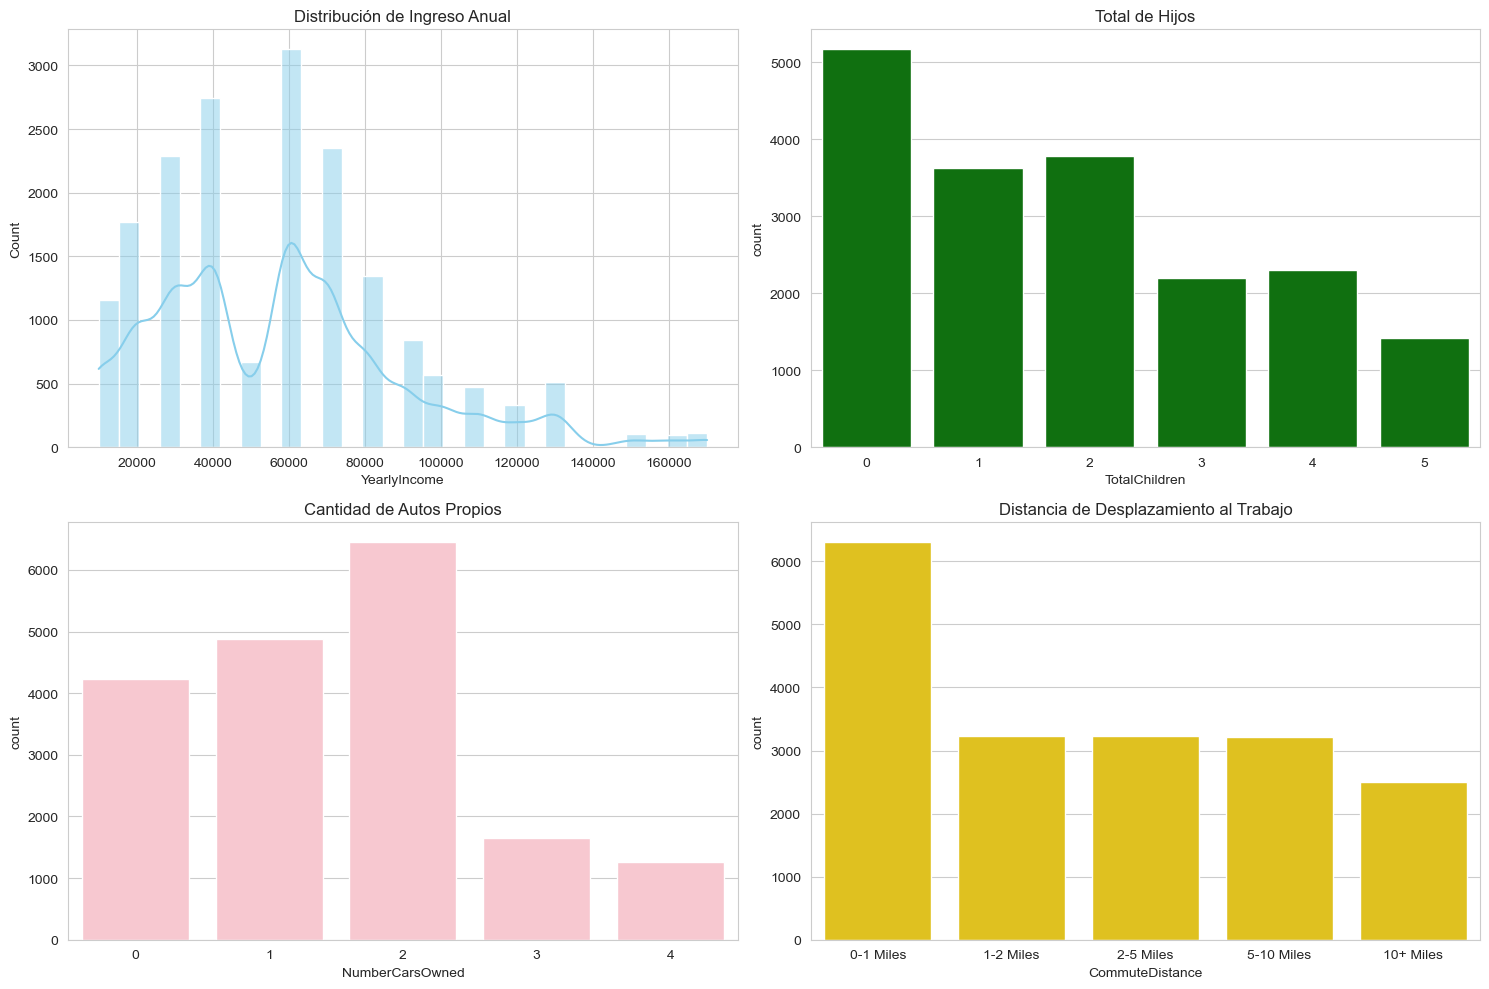

In [6]:
%matplotlib inline
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(ax=axes[0, 0], x='YearlyIncome', data=df, color='skyblue', bins=30, kde=True)
axes[0, 0].set_title('Distribución de Ingreso Anual')

sns.countplot(ax=axes[0, 1], x='TotalChildren', data=df, color='green')
axes[0, 1].set_title('Total de Hijos')

sns.countplot(ax=axes[1, 0], x='NumberCarsOwned', data=df, color='pink')
axes[1, 0].set_title('Cantidad de Autos Propios')

sns.countplot(ax=axes[1, 1], x='CommuteDistance', data=df, color='gold',
            order=['0-1 Miles', '1-2 Miles', '2-5 Miles', '5-10 Miles', '10+ Miles'])
axes[1, 1].set_title('Distancia de Desplazamiento al Trabajo')

plt.tight_layout()
plt.show()

> Ingreso Anual: La mayoría de los clientes tiene un ingreso anual entre 20,000 y 70,000, con un pico notable alrededor de 60,000. La distribución parece estar sesgada hacia la derecha, indicando que hay algunos clientes con ingresos significativamente más altos, aunque son menos comunes.

> Número Total de Hijos: La mayoría de los clientes no tiene hijos (0 hijos), seguido por aquellos que tienen 1 o 2 hijos. A medida que aumenta el número de hijos, la cantidad de clientes disminuye, lo cual sugiere que tener más de 2 hijos es menos frecuente entre los clientes.

> Número de Autos Propios: La distribución muestra que la mayoría de los clientes posee entre 1 y 2 autos, siendo 2 autos la cantidad más común. Muy pocos clientes poseen 3 o más autos, y una cantidad significativa no posee autos propios.

> Distancia de Distancia Desplazamiento: La mayoría de los clientes vive a una distancia corta de su lugar de trabajo (0-1 millas). Las demás distancias son menos comunes, lo que indica que la mayoría de los clientes reside relativamente cerca de su trabajo.

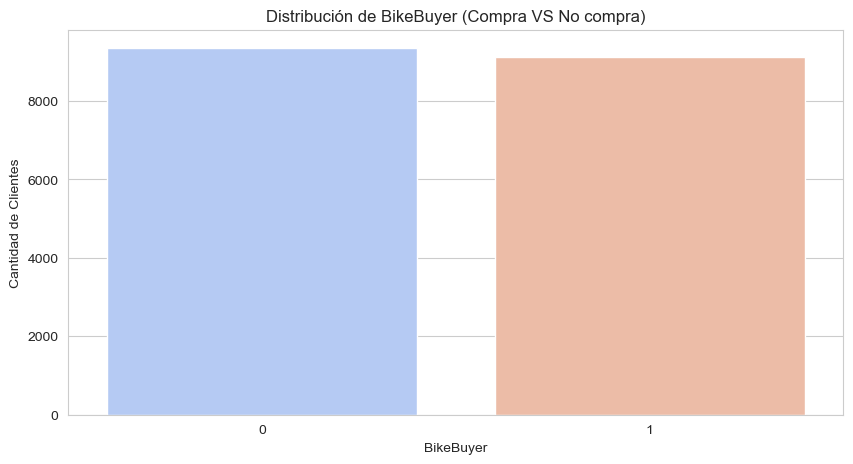

In [7]:
# Gráfico de barras de 'BikeBuyer' (variable objetivo)
plt.figure(figsize=(10, 5))
sns.countplot(x='BikeBuyer', data=df, hue='BikeBuyer', palette="coolwarm", legend=False)
plt.title('Distribución de BikeBuyer (Compra VS No compra)')
plt.ylabel('Cantidad de Clientes')
plt.show()

> La distribución de la variable BikeBuyer muestra que la cantidad de clientes que SÍ han comprado una bicicleta (valor 0) es muy similar a la de aquellos que NO la han comprado (valor 1), por lo que existe un equilibrio en la clase objetivo.

### 2.5 Valores Faltantes

In [8]:
df.isnull().sum()

CustomerKey                 0
GeographyKey                0
CustomerAlternateKey        0
Title                   18383
FirstName                   0
MiddleName               7830
LastName                    0
NameStyle                   0
BirthDate                   0
MaritalStatus               0
Suffix                  18481
Gender                      0
EmailAddress                0
YearlyIncome                0
TotalChildren               0
NumberChildrenAtHome        0
EnglishEducation            0
SpanishEducation            0
FrenchEducation             0
EnglishOccupation           0
SpanishOccupation           0
FrenchOccupation            0
HouseOwnerFlag              0
NumberCarsOwned             0
AddressLine1                0
AddressLine2            18172
Phone                       0
DateFirstPurchase           0
CommuteDistance             0
Region                      0
BikeBuyer                   0
dtype: int64

> Se encontraron valores faltantes en varias columnas, como Title, MiddleName, Suffix, y AddressLine2. Dado que estos atributos son menos relevantes para el modelo de predicción, se sugiere eliminarlos.

## Paso 3: Modificar
En esta fase, se procede a limpiar los datos, abordar las anomalías detectadas y preparar los datos para el modelo.

### 3.1 Limpieza de Datos

In [9]:
# Eliminar columnas con muchos valores nulos
df.drop(columns=['Title', 'MiddleName', 'Suffix', 'AddressLine2'], inplace=True)

In [10]:
# Eliminar columnas que no son relevantes para el modelo
df.drop(columns=['CustomerKey', 'GeographyKey', 'CustomerAlternateKey', 'FirstName', 'LastName', 'NameStyle', 'EmailAddress', 'AddressLine1', 'Phone', 'DateFirstPurchase'], inplace=True)

### 3.2 Ingeniería de características

In [11]:
# Crear la columna 'Age' a partir de 'BirthDate'
df['Age'] = pd.to_datetime('today').year - pd.to_datetime(df['BirthDate']).dt.year
df.drop(columns=['BirthDate'], inplace=True)

In [12]:
# Consolidar columnas multilingües
df['Education'] = df[['EnglishEducation', 'SpanishEducation', 'FrenchEducation']].bfill(axis=1).iloc[:, 0]
df.drop(columns=['EnglishEducation', 'SpanishEducation', 'FrenchEducation'], inplace=True)

df['Occupation'] = df[['EnglishOccupation', 'SpanishOccupation', 'FrenchOccupation']].bfill(axis=1).iloc[:, 0]
df.drop(columns=['EnglishOccupation', 'SpanishOccupation', 'FrenchOccupation'], inplace=True)

### 3.3 Codificación de Variables Categóricas

Aplicamos un mapeo ordinal a ciertas variables categóricas para transformarlas en valores numéricos, cada columna se convierte mediante un diccionario de mapeo específico que refleja el orden o asignación requerida para el análisis. Para la variable Occupation, que es una categoría nominal sin orden específico, usamos LabelEncoder. 

In [13]:
# Diccionario para el mapeo de las columnas categóricas
category_mappings = {
    'Gender': {'M': 1, 'F': 0},
    'MaritalStatus': {'M': 1, 'S': 0},
    'CommuteDistance': {'0-1 Miles': 1, '1-2 Miles': 2, '2-5 Miles': 3, '5-10 Miles': 4, '10+ Miles': 5},
    'Region': {'North America': 1, 'Europe': 2, 'Pacific': 3},
    'Education': {'Partial High School': 1, 'High School': 2, 'Partial College': 3, 'Bachelors': 4, 'Graduate Degree': 5},
}

# Aplicar mapeo ordinal en columnas especificadas
for col, mapping in category_mappings.items():
    df[col] = df[col].map(mapping)

In [14]:
# Transformar la columna Occupation (nominal) usando LabelEncoder
label_encoder = LabelEncoder()
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])

In [15]:
# Muestra del dataset después de los cambios
df.sample(10)

,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,Region,BikeBuyer,Age,Education,Occupation
12168,1,0,70000,2,2,1,1,3,1,1,37,4,4
3552,1,0,20000,1,0,1,0,1,2,0,65,4,0
14785,0,1,90000,3,2,1,1,5,2,0,39,2,3
8897,0,0,70000,4,3,1,1,5,1,1,52,3,3
1688,0,0,90000,0,0,1,3,5,3,1,32,4,3
8753,1,0,20000,4,0,0,2,2,3,0,57,2,4
12444,0,1,30000,0,0,0,1,3,2,1,31,3,0
3130,1,0,20000,0,0,0,0,1,3,1,26,4,0
11200,0,0,70000,2,0,1,2,4,3,1,48,2,3
4717,0,0,70000,0,0,0,2,4,3,1,29,4,3


## Paso 4: Modelar
En esta fase, se va a preparar los datos y aplicar diferentes modelos de clasificación para la variable objetivo *BikeBuyer*. Inicialmente se separan las características y la etiqueta, los datos se dividen en conjuntos de entrenamiento y prueba, luego se entrena cada modelo de clasificación:

- GB: Gradient Boosting
- DT: Árbol de Decisión
- KNN: K-Nearest Neighbors
- ET: Extra Trees Classifier
- RF: Random Forest

### 4.1 Dividir el Conjunto de Datos

In [16]:
# Definición de variables X e y
X = df.drop('BikeBuyer', axis=1)
y = df['BikeBuyer']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Comprobar la forma de los conjuntos
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14787, 12), (3697, 12), (14787,), (3697,))

### 4.2 Entrenar Modelos de Clasificación

#### Modelo 1: Gradient Boosting (GB)

In [17]:
# Entrenamiento del modelo GB
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

### Modelo 2: Árbol de Decisión (DT)

In [18]:
# Entrenamiento del modelo de Árbol de Decisión
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

### Modelo 3: K-Nearest Neighbors (KNN)

In [19]:
# Entrenamiento del modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

### Modelo 4: Extra Trees Classifier (ET)

In [20]:
# Entrenamiento del modelo Extra Trees Classifier
et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_model.fit(X_train, y_train)

ExtraTreesClassifier(random_state=42)

### Modelo 5: Random Forest (RF)

In [21]:
# Entrenamiento del modelo RF
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Paso 5: Evaluar
En esta fase final, procedemos a evaluar los 5 modelos de clasificación anteriormente entrenados, obteniendo conclusiones particulares de cada modelo y finalmente una comparación entre todos los modelos, eligiendo el modelo mas robusto para este proyecto.

### 5.1 Evaluar Modelos de Clasificación

### Modelo 1: Gradient Boosting (GB)

In [22]:
# Predicciones y evaluación
y_pred_gb = gb_model.predict(X_test)
y_pred_prob_gb = gb_model.predict_proba(X_test)[:, 1]

# Reporte de clasificación
print("\nReporte de Clasificación para Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))


Reporte de Clasificación para Gradient Boosting:
              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1884
           1       0.72      0.73      0.72      1813

    accuracy                           0.73      3697
   macro avg       0.73      0.73      0.73      3697
weighted avg       0.73      0.73      0.73      3697



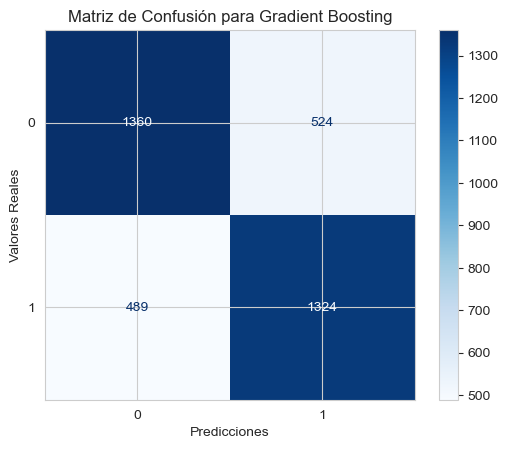

In [23]:
# Matriz de Confusión
cm_gb = confusion_matrix(y_test, y_pred_gb)
ConfusionMatrixDisplay(cm_gb, display_labels=gb_model.classes_).plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión para Gradient Boosting')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

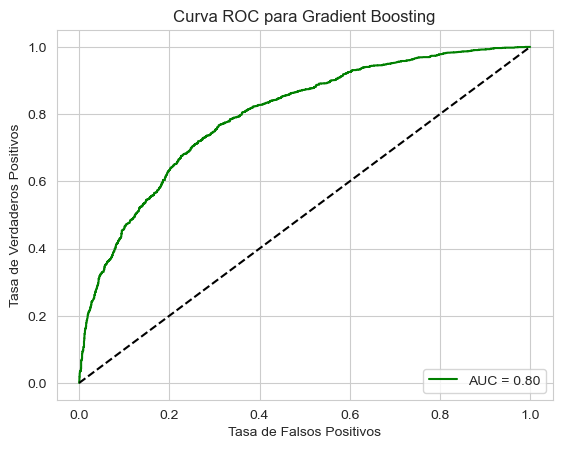

In [24]:
# Curva ROC
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_prob_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

plt.plot(fpr_gb, tpr_gb, color='green', label='AUC = %0.2f' % roc_auc_gb)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para Gradient Boosting')
plt.legend(loc='lower right')
plt.show()

> **Conclusión del Modelo 1**: El modelo Gradient Boosting obtuvo una exactitud del 73% y un AUC de 0.80, mostrando un buen desempeño general en la clasificación de compradores y no compradores. Las métricas son bastante equilibradas entre clases, aunque aún existe margen de mejora para reducir falsos positivos y negativos.

### Modelo 2: Árbol de Decisión (DT)

In [25]:
# Predicciones y evaluación
y_pred_dt = dt_model.predict(X_test)
y_pred_prob_dt = dt_model.predict_proba(X_test)[:, 1]

# Reporte de clasificación
print("\nReporte de Clasificación para Árbol de Decisión:")
print(classification_report(y_test, y_pred_dt))


Reporte de Clasificación para Árbol de Decisión:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78      1884
           1       0.79      0.72      0.75      1813

    accuracy                           0.77      3697
   macro avg       0.77      0.77      0.77      3697
weighted avg       0.77      0.77      0.77      3697



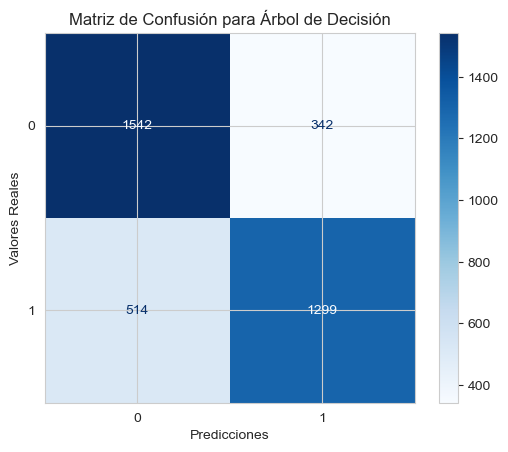

In [26]:
# Matriz de Confusión
cm_dt = confusion_matrix(y_test, y_pred_dt)
ConfusionMatrixDisplay(cm_dt, display_labels=dt_model.classes_).plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión para Árbol de Decisión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

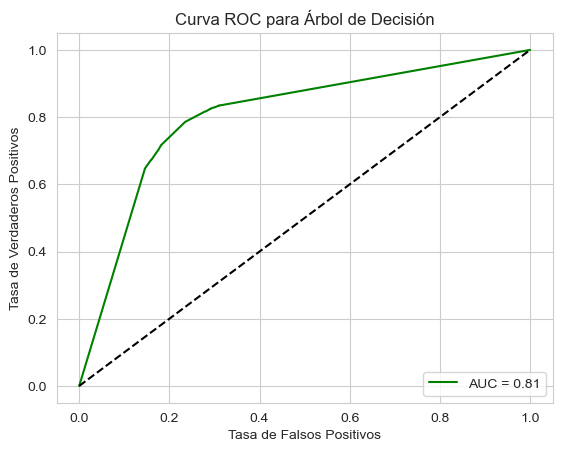

In [27]:
# Cálculo de la curva ROC para el Árbol de Decisión
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.plot(fpr_dt, tpr_dt, color='green', label='AUC = %0.2f' % roc_auc_dt)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para Árbol de Decisión')
plt.legend(loc='lower right')
plt.show()

> **Conclusión del Modelo 2**: El modelo Árbol de Decisión alcanzó una exactitud del 77% y un AUC de 0.81, mostrando buen desempeño general. A pesar de tener un ligero aumento en falsos negativos respecto a otros modelos, se mantiene competitivo en la clasificación de clientes compradores y no compradores.

### Modelo 3: K-Nearest Neighbors (KNN)

In [28]:
# Predicciones y evaluación
y_pred_knn = knn_model.predict(X_test)
y_pred_prob_knn = knn_model.predict_proba(X_test)[:, 1]

# Reporte de clasificación
print("\nReporte de Clasificación para K-Nearest Neighbors:")
print(classification_report(y_test, y_pred_knn))


Reporte de Clasificación para K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.76      0.77      0.77      1884
           1       0.76      0.74      0.75      1813

    accuracy                           0.76      3697
   macro avg       0.76      0.76      0.76      3697
weighted avg       0.76      0.76      0.76      3697



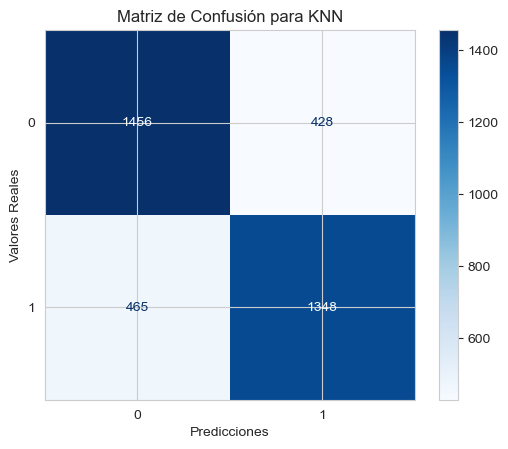

In [29]:
# Matriz de Confusión
cm_knn = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(cm_knn, display_labels=knn_model.classes_).plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión para KNN')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

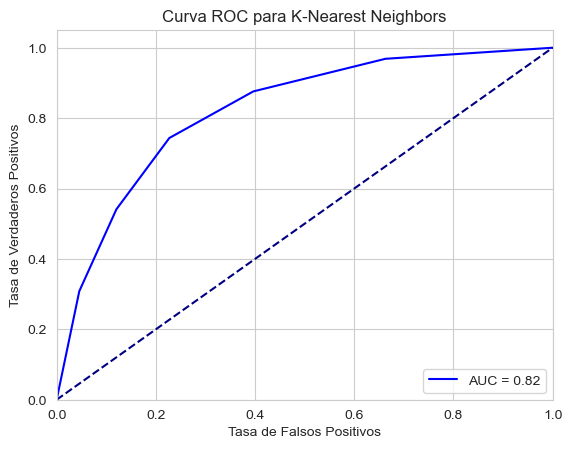

In [30]:
# Cálculo de la curva ROC para KNN
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='blue', label='AUC = %0.2f' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para K-Nearest Neighbors')
plt.legend(loc='lower right')
plt.show()

> **Conclusión del Modelo 3**: El modelo KNN alcanzó una exactitud del 76% y un AUC de 0.82, mostrando un rendimiento sólido. Sin embargo, presenta un leve aumento en los errores de clasificación comparado con modelos como Gradient Boosting, lo que sugiere que su desempeño es bueno, aunque no el más preciso.

### Modelo 4: Extra Trees Classifier (ET)

In [31]:
# Predicciones y evaluación
y_pred_et = et_model.predict(X_test)
y_pred_prob_et = et_model.predict_proba(X_test)[:, 1]

# Reporte de clasificación
print("\nReporte de Clasificación para Extra Trees:")
print(classification_report(y_test, y_pred_et))


Reporte de Clasificación para Extra Trees:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      1884
           1       0.80      0.73      0.76      1813

    accuracy                           0.77      3697
   macro avg       0.78      0.77      0.77      3697
weighted avg       0.78      0.77      0.77      3697



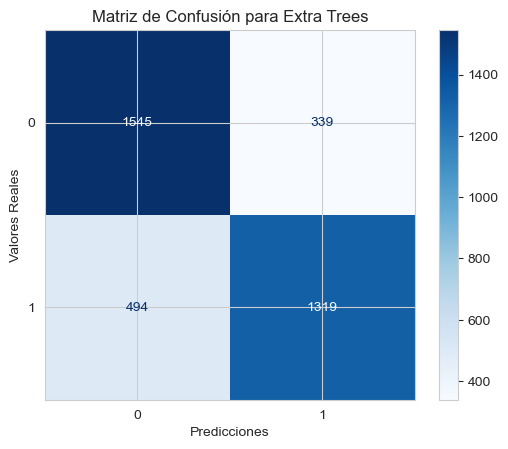

In [32]:
# Matriz de Confusión
cm_et = confusion_matrix(y_test, y_pred_et)
ConfusionMatrixDisplay(cm_et, display_labels=et_model.classes_).plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión para Extra Trees')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

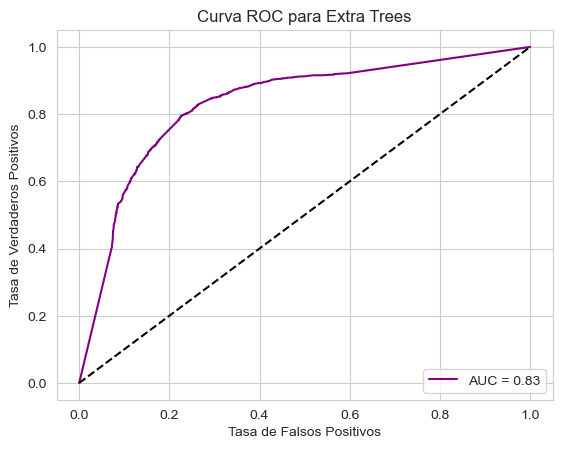

In [33]:
# Curva ROC
fpr_et, tpr_et, thresholds_et = roc_curve(y_test, y_pred_prob_et)
roc_auc_et = auc(fpr_et, tpr_et)

plt.plot(fpr_et, tpr_et, color='purple', label='AUC = %0.2f' % roc_auc_et)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para Extra Trees')
plt.legend(loc='lower right')
plt.show()

> **Conclusión del Modelo 4**: El modelo Extra Trees obtuvo una exactitud del 76% y un AUC de 0.83, posicionándose entre los modelos con mejor capacidad de discriminación. Su balance entre falsos positivos y negativos lo hace robusto, capturando adecuadamente patrones en los datos. Aun así, podría beneficiarse de ajustes finos si se busca máxima precisión.

### Modelo 5: Random Forest (RF)

In [34]:
# Predicciones y evaluación
y_pred_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Reporte de clasificación
print("Reporte de Clasificación para Random Forest:")
print(classification_report(y_test, y_pred_rf))

Reporte de Clasificación para Random Forest:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80      1884
           1       0.79      0.77      0.78      1813

    accuracy                           0.79      3697
   macro avg       0.79      0.79      0.79      3697
weighted avg       0.79      0.79      0.79      3697



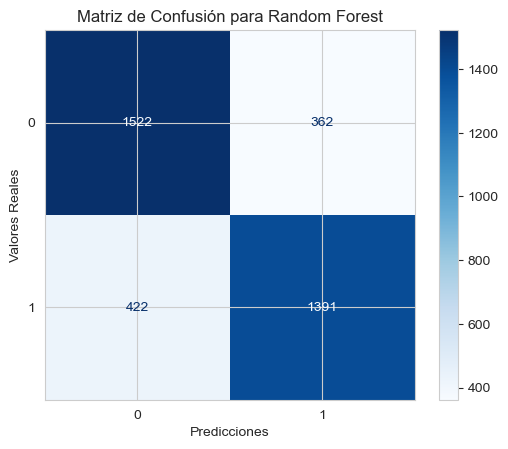

In [35]:
# Matriz de Confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf, display_labels=rf_model.classes_).plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión para Random Forest')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

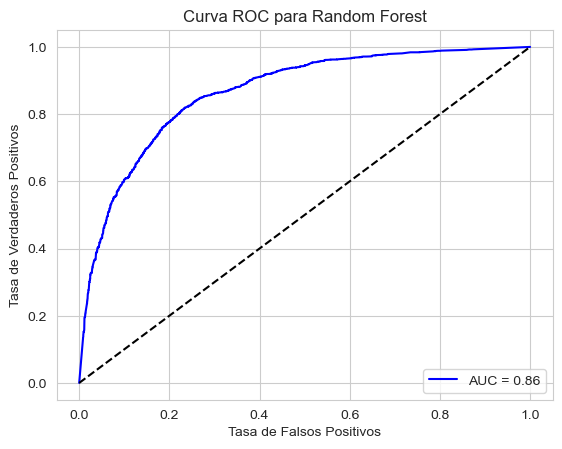

In [36]:
# Curva ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.plot(fpr_rf, tpr_rf, color='blue', label='AUC = %0.2f' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para Random Forest')
plt.legend(loc='lower right')
plt.show()

> **Conclusión del Modelo 5**: El modelo Random Forest alcanzó una exactitud del 78% y un AUC de 0.86, el más alto entre los modelos evaluados. Su capacidad para diferenciar entre compradores y no compradores es destacada, mostrando un rendimiento sólido y confiable. Es una opción altamente competitiva para este problema de clasificación.

### 5.2 Comparar Modelos de Clasificación

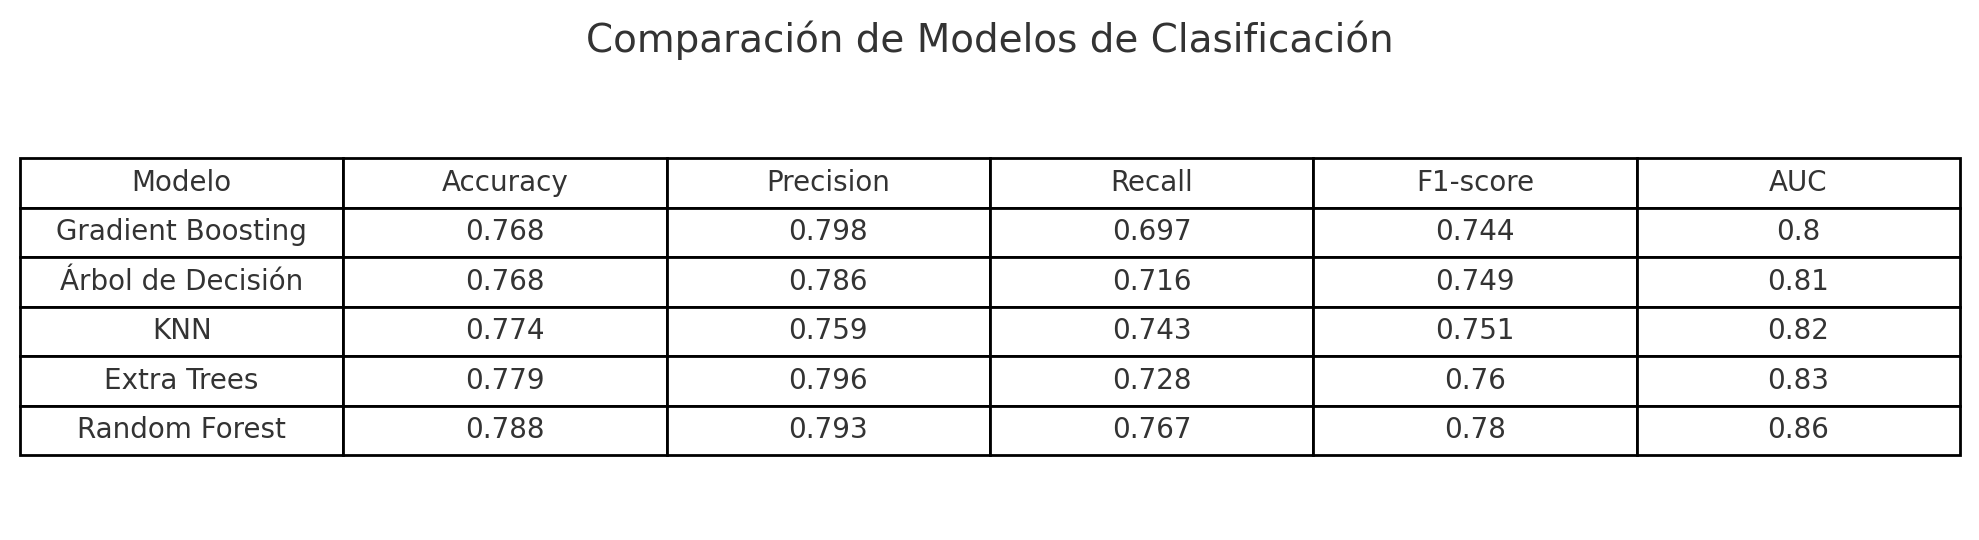

Tras evaluar los cinco modelos con base en métricas como **Accuracy**, **Precision**, **Recall**, **F1-score** y **AUC-ROC**, se observan los siguientes hallazgos:

- **Random Forest** se posiciona como el modelo más robusto, alcanzando el **AUC más alto (0.86)** y el mejor balance entre precisión (0.793) y recall (0.767), lo que lo hace muy eficaz para distinguir entre compradores y no compradores.
- **Extra Trees** también muestra un rendimiento notable, con un **AUC de 0.83** y precisión destacada (0.796), aunque con un ligero descenso en recall (0.728).
- **KNN** alcanza un **AUC de 0.82**, con resultados consistentes pero ligeramente más bajos en todas las métricas clave.
- **Árbol de Decisión** y **Gradient Boosting** empatan en accuracy (0.768), pero el Árbol supera levemente en AUC (0.81 vs. 0.80), mientras que Gradient Boosting mantiene una buena precisión (0.798).

En conclusión, **Random Forest** es el modelo más recomendable para este caso de clasificación, seguido de **Extra Trees**. Ambos ofrecen un rendimiento balanceado y fiable que justifica su elección para una posible implementación.